In [ ]:
import sys
sys.path.append(r"C:\cs229-journey\cs229-journey")

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import problem_sets.PS1.src.util as util

from problem_sets.PS1.src.linear_model import LinearModel

In [12]:
ds4_training_set_path = 'data/ds4_train.csv'
ds4_valid_set_path = 'data/ds4_valid.csv'

In [13]:
x_train, y_train = util.load_dataset(ds4_training_set_path, add_intercept=True)
x_valid, y_valid = util.load_dataset(ds4_valid_set_path, add_intercept=True)

We have a look to the data

In [14]:
#we see that our train set have 4 features (+ intercept)
x_train

array([[1.        , 1.        , 0.        , 0.99204749, 0.32574102],
       [1.        , 0.        , 1.        , 0.47046345, 0.37186578],
       [1.        , 0.        , 1.        , 0.49653283, 0.28985262],
       ...,
       [1.        , 0.        , 1.        , 0.5731734 , 0.42840612],
       [1.        , 0.        , 1.        , 0.60116637, 0.94911474],
       [1.        , 0.        , 1.        , 0.32460144, 0.40509498]],
      shape=(2500, 5))

(d)  Consider a website that wants to predict its daily traffic.
 The website owners have collected a dataset of past tra c to their website, along with
 some features which they think are useful in predicting the number of visitors per day. The
 dataset is split into train/valid/test sets and follows the same format as Datasets 1-3:
 data/ds4_{train,valid}.csv
 We will apply Poisson regression to model the number of visitors per day. Note that ap
plying Poisson regression in particular assumes that the data follows a Poisson distribution
 whose natural parameter is a linear combination of the input features (i.e., $\eta = \theta^T x$).
 In src/p03d_poisson.py, implement Poisson regression for this dataset and use gradient
 ascent to maximize the log-likelihood of $\theta$.

In [15]:
class PoissonRegression(LinearModel):
    """Poisson Regression.

    Example usage:
        > clf = PoissonRegression(step_size=lr)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run gradient ascent to maximize likelihood for Poisson regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        m, n = x.shape
        self.theta = np.zeros(n)
        while True:
            theta = np.copy(self.theta)
            update = self.step_size * np.dot(x.T, (y - np.exp(np.dot(x, self.theta))))/m
            self.theta = self.theta + update
            if np.linalg.norm(self.theta - theta) < self.eps:
                break

    def predict(self, x):
        """Make a prediction given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Floating-point prediction for each input, shape (m,).
        """
        # *** START CODE HERE ***
        probs = np.exp(np.dot(x, self.theta))
        return probs
        # *** END CODE HERE ***

In [16]:
model = PoissonRegression(step_size=1e-7)
model.fit(x_train, y_train)

The MSE over the train set has been 4318600.89
The rel. error over the train set has been 0.0331%


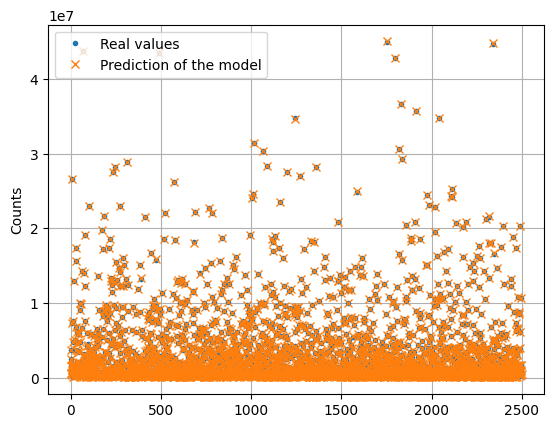

In [17]:
mse_train = np.mean((model.predict(x_train) - y_train)**2)
rel_error = np.linalg.norm(model.predict(x_train) - y_train)/np.linalg.norm(y_train)
print(f"The MSE over the train set has been {mse_train:.2f}")
print(f"The rel. error over the train set has been {rel_error:.4%}")
plt.plot(y_train, '.', label = "Real values")
plt.plot(model.predict(x_train), 'x', label = "Prediction of the model")
plt.ylabel("Counts")
plt.legend()
plt.grid()
plt.show()

The MSE over the train set has been 4318600.89
The rel. error over the train set has been 0.0334%


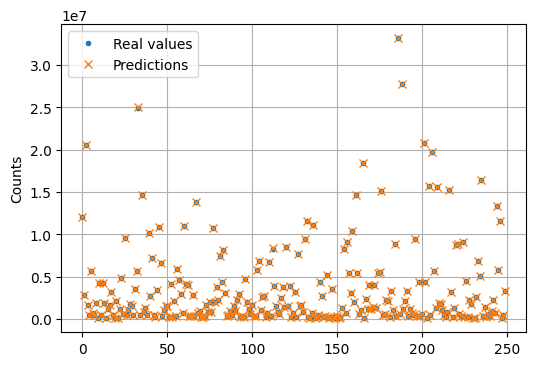

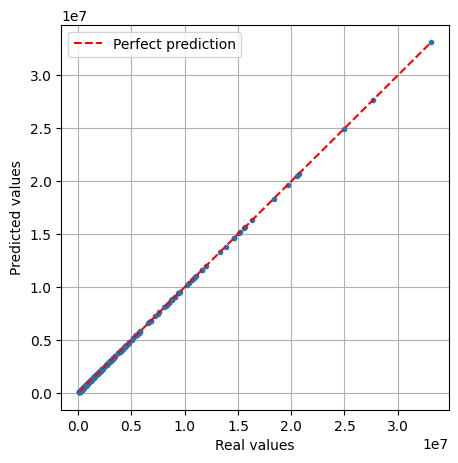

In [18]:
mse_valid = np.mean((model.predict(x_valid) - y_valid)**2)
rel_error = np.linalg.norm(model.predict(x_valid) - y_valid)/np.linalg.norm(y_valid)
print(f"The MSE over the train set has been {mse_train:.2f}")
print(f"The rel. error over the train set has been {rel_error:.4%}")

y_pred = model.predict(x_valid)

plt.figure(figsize=(6,4))
plt.plot(y_valid, '.', label="Real values")
plt.plot(y_pred, 'x', label="Predictions")
plt.ylabel("Counts")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(5,5))
plt.plot(y_valid, y_pred, '.')
plt.plot([y_valid.min(), y_valid.max()],
         [y_valid.min(), y_valid.max()],
         'r--', label="Perfect prediction")
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.legend()
plt.grid()
plt.show()
